# Sequence Models & How to use them

**학습목표**
1. RNN, LSTM, GRU의 구조를 이해한다.
2. 위 모델을 사용하기 위한 데이터 구조를 이해한다.
3. 위 모든 내용을 코딩할 수 있다.

-----------------
* Thanks to : 한기영 대표님 @ Data Insight

## 1.환경 및 데이터 준비

### Import Packages

In [27]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

### Data Loading

In [28]:
url = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Stock_Edwards_Lifesciences_corporation.csv'

# 판다스로 데이터를 불러오시오.
data = pd.read_csv(url)

##3.데이터 준비

### Date 컬럼을 제거하시오.

In [29]:
data.head(7)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600
5,2000/4/3,3.500000,3.703125,3.437500,3.437500,3.437500,11486800
6,2000/4/4,3.531250,3.578125,3.093750,3.500000,3.500000,13136800


In [30]:
data = data.drop(['Date'], axis=1)
data.tail(2)

,Open,High,Low,Close,Adj_Close,Volume
4390,112.459999,112.900002,112.000000,112.339996,112.339996,1251600
4391,112.300003,114.790001,112.010002,113.190002,113.190002,1611700


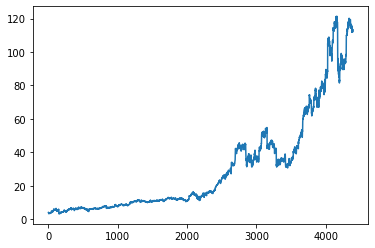

In [31]:
plt.plot(data['Close'])
plt.show()

## 4.Sequence 데이터 구조로 만들기

**조건**
* 내일의 Close를 예측할 것이다. 이를 Y로 둘 것.
* timestep은 4주를 본다. (주식은 5일이 1주일)
* 맞추어 전처리

**데이터 분할 규칙**
* 가장 최근 1주일을 테스트 데이터로 둔다.
* 테스트 데이터를 제외하고, 가장 최근 2주를 벨리데이션 데이터로 둔다.

In [32]:
# 판다스 데이터 프레임을 넘파이로 옮김.
data = data.values

In [33]:
# 여기에 의미있는 기간(timestep을 지정해 봅시다.)
timestep= 5 * 4

x = np.array([ data[i:i + timestep, :] for i in range(len(data) - timestep) ])
y = np.array([ data[i + timestep, -3] for i in range(len(data) - timestep) ])

x_train, x_val, x_test = x[:-15], x[-15:-5], x[-5:]
y_train, y_val, y_test = y[:-15], y[-15:-5], y[-5:]

## 모양 확인 필수
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(4357, 20, 6) (10, 20, 6) (5, 20, 6)
(4357,) (10,) (5,)


데이터의 구조 : [n, timestep, feature수]

# Q.1. 단순 RNN복습

1. 적절한 인풋 레이어를 구성할 것
2. 첫번째 히든레이어 : SimpleRNN
    * 히든스테이트 노드 16개, return_sequences=True
3. 두번째 히든레이어 : SimpleRNN
    * 히든스테이트 노드 32개, return_sequences=True
4. 플래튼
5. 회귀를 위한 적절한 아웃풋 레이어

In [34]:
####################
## Your Code Here ##
####################

# 세션 클리어
keras.backend.clear_session()

# 모델 구성
il = Input(shape=(timestep, 6))
hl = SimpleRNN(16, return_sequences=True)(il)
hl = SimpleRNN(32, return_sequences=True)(hl)
hl = Flatten()(hl)
ol = Dense(1)(hl)

model = keras.models.Model(il, ol)

# 모델 컴파일
model.compile(loss='mse', optimizer='adam')

# summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 6)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 20, 16)            368       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 32)            1568      
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense (Dense)               (None, 1)                 641       
                                                                 
Total params: 2,577
Trainable params: 2,577
Non-trainable params: 0
_________________________________________________________________


In [35]:
## 학습도 시킬 것
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
137/137 [==============================] - 5s 13ms/step - loss: 1020.3931 - val_loss: 6943.1953
Epoch 2/30
137/137 [==============================] - 1s 11ms/step - loss: 875.9061 - val_loss: 6695.0405
Epoch 3/30
137/137 [==============================] - 2s 14ms/step - loss: 876.8253 - val_loss: 7217.6143
Epoch 4/30
137/137 [==============================] - 2s 13ms/step - loss: 875.8193 - val_loss: 6492.6797
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 877.7570 - val_loss: 6964.0771
Epoch 6/30
137/137 [==============================] - 1s 11ms/step - loss: 876.1154 - val_loss: 7370.6865
Epoch 7/30
137/137 [==============================] - 2s 16ms/step - loss: 879.9789 - val_loss: 7101.9180
Epoch 8/30
137/137 [==============================] - 2s 11ms/step - loss: 876.6129 - val_loss: 6801.6221
Epoch 9/30
137/137 [==============================] - 1s 10ms/step - loss: 873.9561 - val_loss: 6429.1411
Epoch 10/30
137/137 [========================

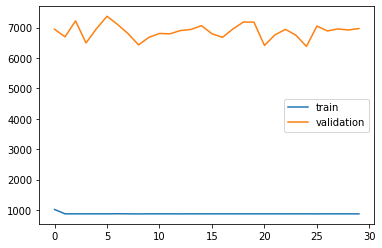

In [36]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [37]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.
y_pred = model.predict(x_test)
print(f'RMSE : {mean_squared_error(y_test, y_pred) ** 0.5}')

1/1 [==============================] - 0s 266ms/step
RMSE : 83.04656725087445


# Q.2. LSTM, GRU 복습

1. 적절한 인풋 레이어를 구성할 것
2. 첫번째 히든레이어 : LSTM
    * 히든스테이트 노드 16개, return_sequences=True
3. 두번째 히든레이어 : GRU
    * 히든스테이트 노드 32개, return_sequences=True
4. 플래튼
5. Fully Connected Layer, 노드 128개, swish
5. 회귀를 위한 적절한 아웃풋 레이어

In [38]:
from tensorflow.keras.layers import LSTM, GRU

In [39]:
####################
## Your Code Here ##
####################

# 세션 클리어
keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(timestep, 6))
hl = LSTM(16, return_sequences=True)(il)
hl = GRU(32, return_sequences=True)(hl)
hl = Flatten()(hl)
hl = Dense(128, activation='swish')(hl)
ol = Dense(1)(hl)

model = keras.models.Model(il, ol)

# 컴파일
model.compile(loss='mse', optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 6)]           0         
                                                                 
 lstm (LSTM)                 (None, 20, 16)            1472      
                                                                 
 gru (GRU)                   (None, 20, 32)            4800      
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense (Dense)               (None, 128)               82048     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 88,449
Trainable params: 88,449
Non-trainable p

In [40]:
## 학습도 시킬 것
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
137/137 [==============================] - 8s 28ms/step - loss: 968.9156 - val_loss: 7080.0952
Epoch 2/30
137/137 [==============================] - 5s 33ms/step - loss: 878.7273 - val_loss: 6789.9673
Epoch 3/30
137/137 [==============================] - 3s 22ms/step - loss: 878.9962 - val_loss: 6612.5845
Epoch 4/30
137/137 [==============================] - 3s 22ms/step - loss: 877.8103 - val_loss: 6842.7490
Epoch 5/30
137/137 [==============================] - 4s 27ms/step - loss: 880.1181 - val_loss: 6752.6968
Epoch 6/30
137/137 [==============================] - 3s 23ms/step - loss: 879.2574 - val_loss: 6842.0049
Epoch 7/30
137/137 [==============================] - 3s 22ms/step - loss: 878.1593 - val_loss: 6962.3726
Epoch 8/30
137/137 [==============================] - 3s 22ms/step - loss: 878.8538 - val_loss: 6605.4092
Epoch 9/30
137/137 [==============================] - 4s 27ms/step - loss: 878.0119 - val_loss: 6490.3940
Epoch 10/30
137/137 [=========================

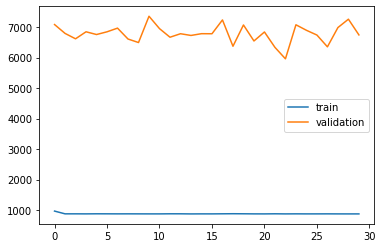

In [41]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [42]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.
y_pred = model.predict(x_test)
print(f'RMSE : {mean_squared_error(y_test, y_pred) ** 0.5}')

1/1 [==============================] - 1s 762ms/step
RMSE : 81.67833605682799
